<a href="https://colab.research.google.com/github/Jaqueline-Esposito/Data-Science/blob/main/Projeto_de_Ci%C3%AAncia_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CIÊNCIA DE DADOS E MODELO DE PREVISÃO**

A Ciência de Dados, hoje muito utilizada no segimento empresarial, tem por finalidade gerar conclusões, modelos, ***insigths*** a partir de uma variedade de informações, dados extraídos das fontes computacionais.

Nesse contexto, é através da estatística e dos modelos de previsão alinhados ao conhecimento do negócio que se permite obter resultados mais precisos e visar a solução de problemas.

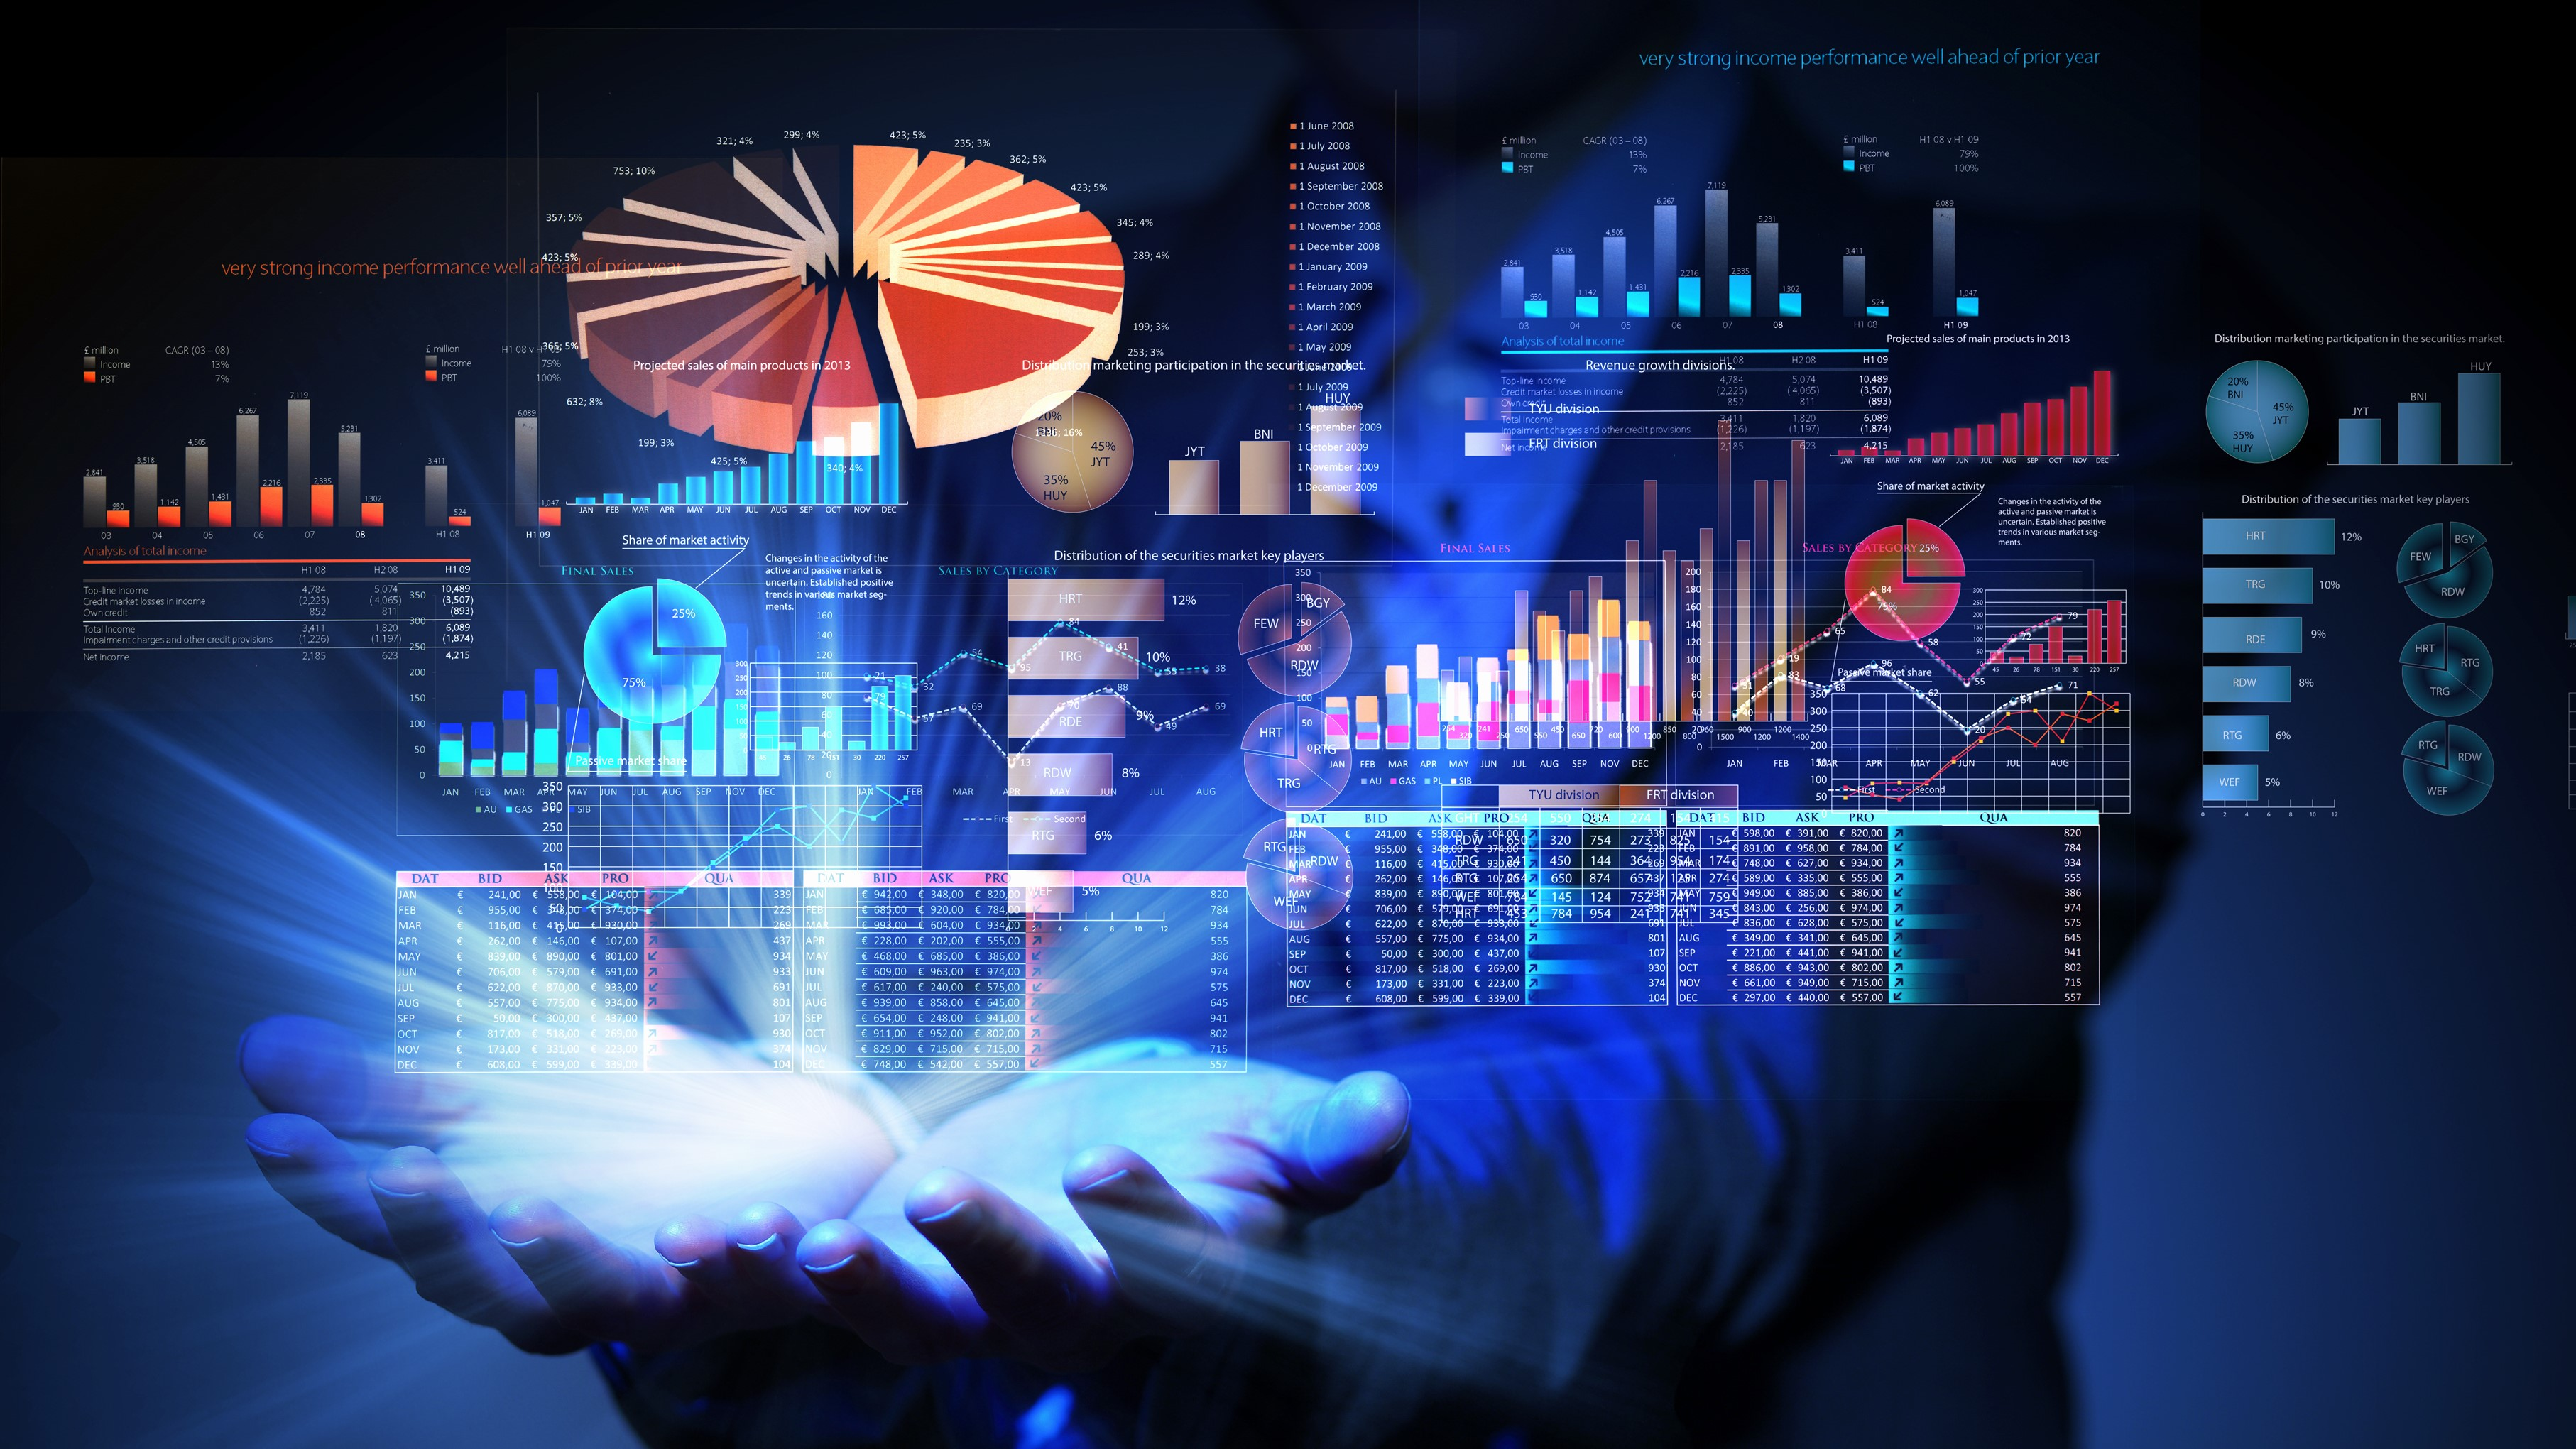

Com base em Ciência de Dados vamos realizar uma análise e prever as vendas de um determinado período, tendo como amparo 3 canais de anúncios de propaganda.

**EXTRAÇÃO/OBTENÇÃO DE DADOS**

In [8]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [22]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/advertising.csv')
display(df)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


Aqui temos uma tabela exibida pela variável, a qual apresenta 200 linhas e 4 colunas, contendo ainda dentro delas os 3 canais de propaganda e o valor de vendas.

**AJUSTE DE DADOS/LIMPEZA DE DADOS**

Essa é uma das fases operacionais do processo de Ciência de Dados, o ajuste ou limpeza de dados.

O que estamos buscando aqui são:

• Dados faltantes;

• Dados com valor 0 quando deveriam
ser valores coerentes;

• Outliers que não representam bem o
histórico e logo não ajudam a criação do
modelo;

• Erros na base;

• Erros de importação;

A ferramenta que pode nos ajudar a ter uma
visão bem geral dos dados é o método *.info()*.

In [23]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


Como podemos ver acima, os dados parecem coerentes. Portanto, desnecessária se faz a limpeza de dados.

**ANÁLISE EXPLORATÓRIA**

Com o uso do *Python* e do *Pandas*, vamos poder gerar uma série de análises estatísticas/gráficas que nos permita entender melhor como esses dados se comportam.

Para isso, é necessário importar 2 bibliotecas que nos auxiliam a criar gráficos:

• Seaborn;

• Matplotlib;

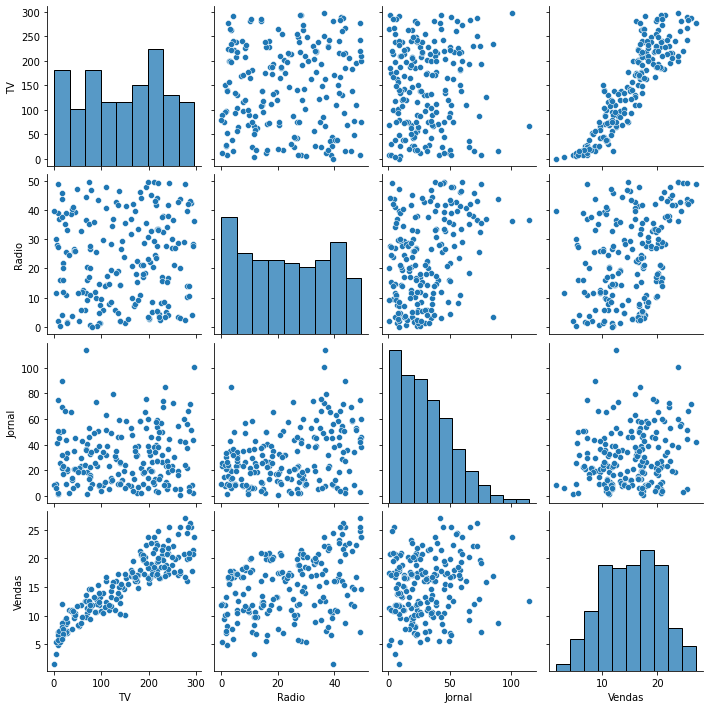

In [30]:
import seaborn as sns
import matplotlib as plt

sns.pairplot(df)

Aqui usamos um gráfico de dispersão para cada uma das combinações de colunas possíveis. Isso nos permite perceber se existem alguma relação entre elas.

Aqui vamos utilizar 2 dos 16 gráficos para entende-los melhor. Antes da análise vamos entender o que são os pontos do gráfico.

Aqui, temos o resultado em vendas (eixo y) pel investimento no canal (eixo x).Só de olhar conseguimos ver uma diferença gritante no formato do gráfico. No gráfico TV X VENDAS, podemos perceber que existe uma proporcionalidade no investimento e o aumento das vendas.

Ou seja, quando invisto em anúncios de TV, tendo a vender mais. Já no gráfico RADIO X VENDAS, essa proporcionalidade não é clara. Na verdade, não é muito obvia a relação entre elas.

Nesse caso, as vendas tendem a existir com alto ou baixo investimento nos anúncios de rádio.

Após a análise dos gráficos acima, foi possível verificar alguns pontos direcionadores. Vamos usar outro método da biblioteca seaborn
para conseguirmos avaliar melhor os dados, fazendo uma correlação.

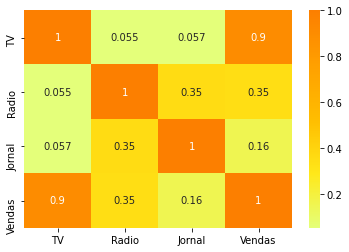

In [33]:
sns.heatmap(df.corr(), cmap='Wistia', annot=True)

**MODELAGEM E ALGORITMOS**

Vamos agora para fase de criação de um modelo. O que precisamos identificar são:

• Os *inputs*(entradas) do modelo (eixo X);

• Os *outputs*(saídas) do modelo (eixo Y);

Lembrando que nosso objetivo é criar um modelo de previsão de vendas baseado nos dados de investimento nos diferentes canais (TV, radio, jornais). Ou seja, nossos inputs são valor do investimento nos diferentes canais e nosso output será a venda prevista dado os inputs informados.

In [38]:
from sklearn.model_selection import train_test_split

x=df.drop('Vendas', axis=1)
y=df['Vendas']

Agora temos claro nas nossas variáveis X e Y quais são os Inputs e quais são os Outputs. Agora, com a ajuda de uma *IA* (Inteligência Artificial) vamos criar um modelo de previsão treinando e testando o modelo.

Sabemos que temos 200 pontos não nulos na nossa base (informação dada pelo método info na fase de limpeza), assim para termos uma certeza maior a melhor opção é dividir esse número em treinos e testes.

In [39]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=1)

Iniciamos por novas importações de dados. Aqui usaremos dois métodos distintos de regressão:

• Regressão Linear;

• Random Forest Regressor;

Além disso, usaremos o *numpy* que é uma biblioteca muito utilizada para grande volume de cálculos. No código abaixo, iniciaremos o treino da inteligência artificial com a regressão Linear e depois com Random Forest.

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

# Treino da IA
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

rf_reg = RandomForestRegressor()
rf_reg.fit(x_train, y_train)

# Teste da IA
test_pred_lin = lin_reg.predict(x_test)
test_pred_rf = rf_reg.predict(x_test)

r2_lin = metrics.r2_score(y_test, test_pred_lin)
rmse_lin = np.sqrt(metrics.mean_squared_error(y_test, test_pred_lin))
print(f"R² da Regressão Linear: {r2_lin}")
print(f"RSME da Regressão Linear: {rmse_lin}")
r2_rf = metrics.r2_score(y_test, test_pred_rf)
rmse_rf = np.sqrt(metrics.mean_squared_error(y_test, test_pred_rf))
print(f"R² do Random Forest: {r2_rf}")
print(f"RSME do Random Forest: {rmse_rf}")


R² da Regressão Linear: 0.9071151423684272
RSME da Regressão Linear: 1.539694765603124
R² do Random Forest: 0.9622719279800751
RSME do Random Forest: 0.9812834622744513


Feito o treino, agora precisamos iniciar os testes. Perceba que agora, são utilizadas as variáveis finais *_test* e não mais as *_train*. Mas como saber se o teste foi bom ou não? Com os indicadores R² e RSME.

Sem entrar em detalhes estatísticos eles descrevem a qualidade da sua regressão.
Se olharmos o print do nosso código, veremos que o valor de R² do Random Forest é maior que o valor da regressão linear(valor varia entre 0 e 1). Além disso, ao vermos que temos 0,96 como resultado, podemos inferir que temos um modelo confiável.

**INTERPRETAÇÃO DO RESULTADO**


,y_test,y_previsao_rf,y_previsao_lin
0,23.8,23.080,21.288161
1,16.6,18.002,18.042132
2,11.9,12.662,10.059590
3,19.8,17.483,21.082241
4,17.6,20.175,20.764760
5,25.5,24.831,24.471874
6,16.9,16.949,16.806436
7,17.9,16.479,15.628857
8,10.5,11.124,10.124799
9,17.1,18.254,18.846019


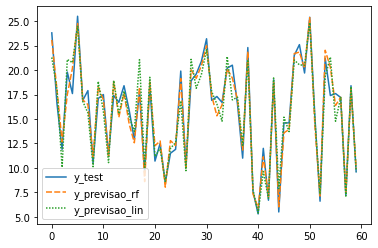

In [54]:
df_resultado = pd.DataFrame()

# df_resultado.index = x_test
df_resultado['y_test'] = y_test
df_resultado['y_previsao_rf'] = test_pred_rf
df_resultado['y_previsao_lin'] = test_pred_lin
df_resultado = df_resultado.reset_index(drop=True)
sns.lineplot(data=df_resultado)
display(df_resultado)

O gráfico ao lado mostra todos os 60 pontos de teste que são dados reais extraídos da base ao lado das duas curvas geradas pelos modelos. A linha azul representa os dados reais de teste. A linha tracejada laranja representa os dados de previsão calculados pelo modelo de Random Forest.

Já a linha verde tracejada representa os dados de previsão calculados pelo modelo de Regressão Linear.

Na fase exploratória percebemos que o investimento em TV era o que possuía maior
correlação com as vendas, será que o modelo acima possui a mesma
característica?

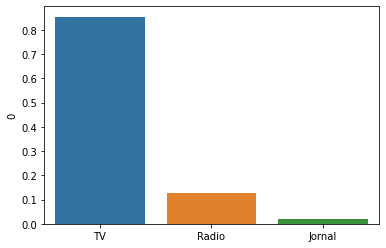

In [59]:
importancia_features = pd.DataFrame(rf_reg.feature_importances_, x_train.columns)
sns.barplot(x=importancia_features.index, y=importancia_features[0])

Utilizando outro gráfico, podemos perceber que em termos de importância para o modelo via Random Forest (IA):

• O investimento em TV é 85% relevante;

• O Rádio o investimento é de pouco mais de 10%;

• Jornal não chegando a mais de 5% de relevância.

**CONCLUSÃO**

Então, dá análise retira-se que em termos de vendas a propaganda realizada dentro da TV é mais vantajosa para a empresa, sendo que em segundo lugar ficaria o rádio e em terceiro o jornal.

Outro *insight* importante retirado dos dados acima é que tendo em vista o alto índice de vendas por TV, em relação à futuros investimentos, o índice revela onde a empresa deve investir, bem como que há também uma certa falta de desempenho nas propagandas do rádio e do jornal, possibilitando que a empresa reveja a execução de tais anúncios.